# 문제 1. 기초통계량 계산
**📘 문제**
- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

  - 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
  - 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
  - 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.

In [37]:
# 파이썬 라이브러리 및 모듈 가져오기 & 한글 폰트 설정하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# MacOS에서는 기본 한글 폰트로 AppleGothic 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [38]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

In [46]:
df1

,score
0,7.361415
1,8.601428
2,5.341677
3,6.504867
4,7.348908
...,...
995,5.588019
996,7.039904
997,6.907670
998,5.075884


In [40]:
# 기초 통계량 계산
mean = df1['score'].mean()
median = df1['score'].median()
mode = (df1['score']).mode()[0]
std = df1['score'].std()

print(f"평균: {mean:.2f}")
print(f"중앙값: {median:.2f}")
print(f"최빈값: {mode:.2f}")
print(f"표준편차: {std:.2f}")

평균: 7.43
중앙값: 7.42
최빈값: 10.00
표준편차: 1.39


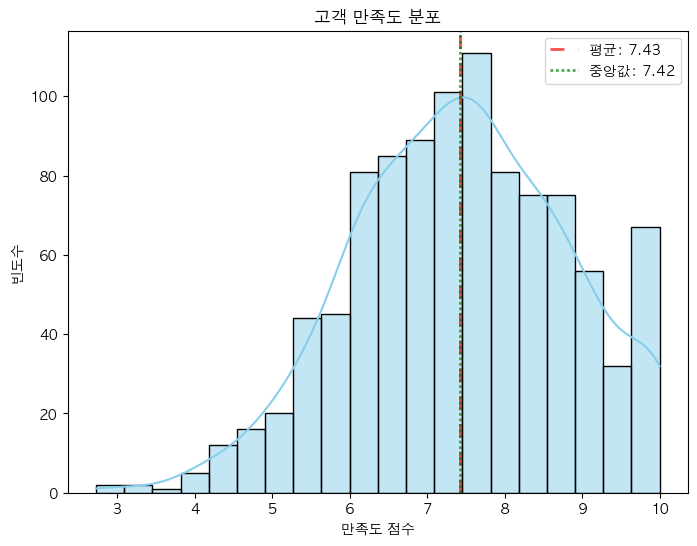

In [41]:
# 히스토그램 + 평균/중앙값 선 표시
plt.figure(figsize=(8,6))
sns.histplot(df1['score'], bins=20, kde=True, color='skyblue')

# 평균, 중앙값 선 그리기
plt.axvline(mean, color = 'red', linestyle=(0,(5,5)), linewidth=2, alpha=0.7, label=f'평균: {mean:.2f}')
plt.axvline(median, color = 'green', linestyle=(0,(1,1)), linewidth=2, alpha=0.7, label=f'중앙값: {median:.2f}')

plt.title("고객 만족도 분포")
plt.xlabel("만족도 점수")
plt.ylabel("빈도수")
plt.legend()
plt.show()

In [42]:
# 7점 이상 비율 확인
high_score_ratio = (df1['score'] >= 7).mean() * 100
print(f"7점 이상 고객 비율: {high_score_ratio:.2f}%")


7점 이상 고객 비율: 62.20%


**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?  
-> 평균: 7.43, 중앙값: 7.42 → 차이: 0.01  

- 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)  
-> 두 값이 매우 비슷하므로, 데이터는 대칭형(정규분포에 가까움)으로 볼 수 있다.  

- 두 값의 차이가 크다면, 그 이유는 무엇일까요?  
-> 이상값(Outlier)이나 특정 구간에 몰린 값들 때문에 평균이 끌려갔을 수 있다.  

- 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?  
-> 극단적으로 낮은 점수(1~3점)나 극단적으로 높은 점수(9~10점)가 평균을 변화시킨다.  

---

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?  
-> 왼쪽  

- 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?  
-> 오른쪽으로 치우쳐 있음. 높은 점수를 준 고객이 많다.  

---

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?  
->  
- 긍정적 홍보: 약 62%의 고객이 7점 이상을 줬다는 점을 마케팅 메시지로 활용  
- 불만 고객 관리: 6점 이하 고객을 분석해 불만 요인을 개선  
- 충성 고객 강화: 최빈값이 8점인 고객층을 VIP 집단으로 정의하고 멤버십, 추가 혜택 제공  
- 일관성 유지: 표준편차가 약 1.39로 크지 않아, 대부분의 점수가 6~9점에 집중 → 현재 수준의 서비스 품질을 꾸준히 유지하는 게 중요  


# 문제 2. 평균 vs 중앙값 비교

**📘 문제**
- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.

In [43]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역 : 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),      # 일반 소득자 95명
    np.random.normal(1500, 200, 5)      # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

pd.DataFrame({...}) : 판다스 데이터프레임 생성

'region': ['A'] * 100 + ['B'] * 100

['A'] * 100 → A가 100번 반복된 리스트

['B'] * 100 → B가 100번 반복된 리스트

합치면 총 200개 (앞 100개는 A, 뒤 100개는 B)

즉, 각 행이 어느 지역 데이터인지 표시

'salary': np.concatenate([region_a, region_b])

위에서 만든 A지역과 B지역 연봉 데이터를 합침

총 200개의 연봉 숫자가 들어감

In [45]:
df2

,region,salary
0,A,295.380491
1,A,336.714279
2,A,228.055899
3,A,266.828899
4,A,294.963596
...,...,...
195,B,1668.477201
196,B,1581.119661
197,B,1637.123979
198,B,1709.906631


In [48]:
# 각 지역의 평균 연봉과 중앙값 구하기
group_stats = df2.groupby('region')['salary'].agg(['mean', 'median'])
group_stats

,mean,median
region,,
A,292.506637,294.324483
B,347.594909,287.347488


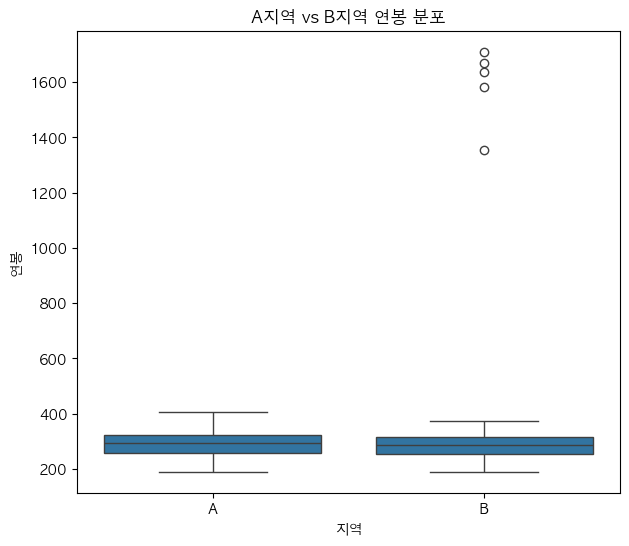

In [50]:
# 박스플롯 그리기
plt.figure(figsize=(7,6))
sns.boxplot(x='region', y='salary', data=df2)

plt.title("A지역 vs B지역 연봉 분포")
plt.xlabel("지역")
plt.ylabel("연봉")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?  
   - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?  
   -> A 지역 평균: 292.51, B 지역 평균: 347.59 / B 지역의 평균 연봉이 더 높다.  
   - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?  
   -> 평균값이 높아진다.  

2. 중앙값은 어떠한가요?  
   - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?  
   -> A 지역 중앙값: 294.32, B 지역 중앙값: 287.35 / B 지역은 평균은 높지만 중앙값은 낮으므로, 소수의 고소득자가 평균을 끌어올린 것으로 해석할 수 있다.  

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?  
   - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?  
   -> 평균  

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?  
   - 이상치(Outlier)는 어떻게 표시되나요?  
   -> 박스 수염을 벗어난 동그라미로 표시된다.  
   - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?  
   -> 큰 차이는 없으나 B 지역의 분포 폭이 약간 더 작다.  

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?  
   - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?  
   -> 평균만 보면 B 지역의 연봉이 더 높다고 생각할 수 있지만, 중앙값을 보면 오히려 A 지역이 더 높다는 걸 알 수 있다.  


# 문제 3. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [52]:
# 데이터 생성
np.random.seed(2025)    # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),   # 일반 학생
    [0, 130]                        # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

In [54]:
df3.head()

,class,score
0,1반,74.260879
1,1반,80.874285
2,1반,63.488944
3,1반,69.692624
4,1반,74.194175


In [55]:
# 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
group_stats = df3.groupby('class')['score'].agg(['mean', 'std', 'min', 'max'])
group_stats

,mean,std,min,max
class,,,,
1반,75.724316,7.062710,60.685416,92.175893
2반,73.728848,22.340818,0.000000,130.000000


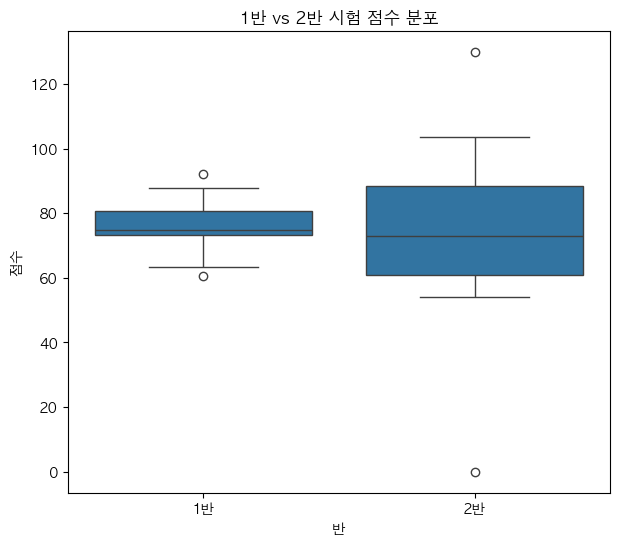

In [56]:
# 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
plt.figure(figsize=(7,6))
sns.boxplot(x='class', y='score', data=df3)

plt.title("1반 vs 2반 시험 점수 분포")
plt.xlabel("반")
plt.ylabel("점수")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?  
-> 2반의 점수 분산이 더 크다. 표준편차가 크고, 0점·130점 같은 극단적인 이상값이 포함되어 있기 때문이다.  
- 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?  
-> 표준편차, 최소/최대값 같은 지표로 확인할 수 있다.  
- 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?  
-> 표준편차와 범위가 커진다.  

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?  
- 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?  
-> 2반의 평균은 1반과 큰 차이는 없지만, 이는 0점과 130점이 서로 상쇄된 결과다. 일반적으로는 이상값이 평균을 왜곡시켜 끌어내리거나 끌어올린다.  
- 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?  
-> 평균은 이상값에 민감하게 반응하지만, 중앙값은 데이터의 중간 위치를 보여주기 때문에 이상값의 영향을 덜 받는다.  

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?  
- 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?  
-> 박스 수염을 벗어난 동그라미로 표시된다.  
- 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?  
-> 2반의 박스(사분위 범위)가 1반보다 훨씬 크다. 이는 점수 분포가 더 넓게 퍼져 있다는 것을 의미한다.  

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?  
- 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?  
-> 극소수의 고득점자나 저득점자의 존재를 알 수 없고, 분포의 실제 모양을 파악할 수 없다.  
- 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?  
-> 평균만으로는 데이터의 분포와 이상값 영향을 알 수 없기 때문에, 중앙값·표준편차 같은 보조 지표를 함께 봐야 한다.  

